# Discussion Post 3: Exploratory Data Analysis 
--What do you find that is different from what you expected? 
--What are some of the key trends or observations in your datasets? 
--Are there additional datasets that you could incorporate? 
--How are you cleaning the data or accounting for messy data?
--Refine your hypothesis, if necessary. Provide rationale for your exploration. 

For this Exploratory Data Analysis, we combined five years of survey data (2016-2020), and selected columns (features) that relate to our target question labeled "Q237" in our dataset to make a new dataframe for future ML project. Q237 is the respondent's answer to the question (asked each year) "Are you considering leaving your organization within the next year, and if so, why?" We call this "the stay or go decision." (The question was asked slightly differently in 2020, where is is Q231.)

In [1]:
#load libraries 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
sns.set(style="ticks", color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/opt/anaconda3/envs/capstone_env1/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# to look up the questions 
questions= pd.read_csv('survey_questions.csv', low_memory=False)

# Survey Indexes: EEI, GSI, and NIQ
There are 186 variables in our dataset, with 2.7M rows across all five years. To narrow our focus on features that might predict the Stay or Go Decision, we chose columns that reflected responses to questions that were included in three indexes in past survey years: the Employee Engagement Index (EEI), the Global Satisfaction Index (GSI), and the New Inclusion Quotient (NIQ). The EEI and the GSI are the most freqently reported indexes each year. In addition, the EEI was found to positively correlate with the decision to Stay or Go when the EEI was introduced in 2016. Therefore, we will focus on the questions in the EEI and GSI index. We also selected demographics columns for future analysis.

EEI index questions:<br>
Q104 my_work_experience My work gives me a feeling of personal accomplishment.<br>
Q105 my_work_experience I know what is expected of me on the job. <br>
Q106 my_work_experience My workload is reasonable. <br>
Q107 my_work_experience My talents are used well in the workplace.<br>
Q108 my_work_experience I know how my work relates to the agency's goals. <br>
Q122 my_work_experience Supervisors in my work unit support employee development.<br>
Q123 my_work_experience My supervisor listens to what I have to say. <br>
Q124 my_work_experience My supervisor treats me with respect.<br>
Q125 my_work_experience I have trust and confidence in my supervisor. <br>
Q126 my_work_experience Overall_ how good a job do you feel is being done by your immediate supervisor? <br>
Q127 my_work_experience In my organization_ senior leaders generate high levels of motivation and commitment in the workforce.<br>
Q128 my_work_experience My organization's senior leaders maintain high standards of honesty and integrity.<br>
Q129 my_work_experience Managers communicate the goals of the organization.<br>
Q131 my_work_experience Overall_ how good a job do you feel is being done by the manager directly above your immediate supervisor? <br>
Q132 my_work_experience I have a high level of respect for my organization's senior leaders. <br>
Q237 demographics Are you considering leaving your organization within the next year_ and if so_ why?<br>

GSI	index questions:<br>
Q118	my_agency	I recommend my organization as a good place to work.<br>
Q137	individual	Considering everything_ how satisfied are you with your job?<br>
Q138	individual	Considering everything_ how satisfied are you with your pay?<br>
Q139	individual	Considering everything_ how satisfied are you with your organization?<br>

Demographic questions:<br>
Q222	demographics	Please select the racial category or categories with which you most closely identify. <br>
Q223	demographics	Are you of Hispanic_ Latino_ or Spanish origin? <br>
Q224	demographics	Are you an individual with a disability? <br>
Q225	demographics	What is your age group? <br>
Q226	demographics	What is your supervisory status? <br>
Q227	demographics	How long have you been with the Federal Government (excluding military service)? <br>
Q229	demographics	What is your US military service status? <br>
Q235	demographics	What is the highest degree or level of education you have completed?<br>
<b>Q237	demographics	Are you considering leaving your organization within the next year_ and if so_ why?</b><br>
<b>Q231 (2020 only)	demographics	Today: (September-October 2020) Are you considering leaving your organization within the next year, and if so, why?</b>
Q232 (2020 only)	demographics	Has your intention to leave your organization within the next year changed because of the COVID-19 pandemic?<br>


New Inclusion Quotient index questions:<br>
Q130	my_work_experience	Managers promote communication among different work units (for example_ about projects_ goals_ needed resources).<br>
Q268	my_work_experience	Managers support collaboration across work units to accomplish work objectives.<br>
Q103	my_work_experience	I feel encouraged to come up with new and better ways of doing things.<br>
Q238	my_work_experience	I have enough information to do my job well.<br>
Q255	my_agency	Employees have a feeling of personal empowerment with respect to work processes.<br>
Q111	my_work_unit	In my work unit_ steps are taken to deal with a poor performer who cannot or will not improve.<br>
Q113	my_work_unit	In my work unit_ differences in performance are recognized in a meaningful way.<br>
Q251	my_work_unit	Awards in my work unit depend on how well employees perform their jobs.<br>
Q260	my_agency	Arbitrary action_ personal favoritism and coercion for partisan political purposes are not tolerated.<br>
Q261	my_agency	Prohibited Personnel Practices (for example_ illegally discriminating for or against any employee/applicant_ obstructing a person's right to compete for employment_ knowingly violating veterans' preference requirements) are not tolerated.<br>
Q121	my_work_experience	My supervisor is committed to a workforce representative of all segments of society.<br>
Q256	my_agency	Creativity and innovation are rewarded.<br>
Q258	my_agency	Policies and programs promote diversity in the workplace (for example_ recruiting minorities and women_ training in awareness of diversity issues_ mentoring).<br>
Q266	my_work_experience	Supervisors work well with employees of different backgrounds.<br>
Q120	my_work_experience	My supervisor supports my need to balance work and other life issues.<br>
Q264	my_work_experience	My supervisor provides me with constructive suggestions to improve my job performance.<br>

In [3]:
#look specific [[rows],[cols];
questions.iloc[[2,186],[2]]

,question_text
2,Randomly Assigned Number for individual cases
186,Are you looking for another job because of the...


In [4]:
#Joy's questions info
#dfquestions = pd.read_csv('/Users/wuc3/Downloads/Capstone/survey_questions joy1.csv' )
#dfquestions.head(50)

# Read in to dataframes 2016 to 2020 FEVS survey data

In [5]:
# need to give the path of these file on you own
df2016 = pd.read_csv('Standardized_Columns_fevs_2016_prdf.csv', low_memory=False)
df2017 = pd.read_csv('Standardized_Columns_fevs_2017_prdf.csv', low_memory=False)
df2018 = pd.read_csv('Standardized_Columns_fevs_2018_prdf.csv', low_memory=False)
df2019 = pd.read_csv('Standardized_Columns_fevs_2019_prdf.csv', low_memory=False)
df2020 = pd.read_csv('Standardized_Columns_fevs_2020_prdf.csv', low_memory=False)


In [6]:
#find cols' names in a dataframe: 
for col in df2016.columns:
    print(col)

response_id
year
agency_id
Q234
Q226
Q228
Q225
Q236
Q237
Q102
Q238
Q103
Q104
Q239
Q105
Q240
Q241
Q242
Q106
Q107
Q108
Q243
Q244
Q245
Q246
Q109
Q247
Q248
Q110
Q249
Q250
Q111
Q113
Q251
Q252
Q253
Q254
Q114
Q255
Q115
Q256
Q257
Q258
Q116
Q259
Q260
Q261
Q117
Q118
Q119
Q120
Q262
Q263
Q121
Q264
Q122
Q123
Q124
Q265
Q125
Q126
Q127
Q128
Q266
Q129
Q267
Q130
Q268
Q131
Q132
Q133
Q134
Q135
Q136
Q269
Q270
Q271
Q137
Q138
Q139
Q233
random
Q112
Q140
Q141
Q142
Q143
Q144
Q145
Q146
Q147
Q148
Q149
Q150
Q151
Q152
Q153
Q154
Q155
Q156
Q157
Q158
Q159
Q160
Q161
Q162
Q163
Q164
Q165
Q166
Q167
Q168
Q169
Q170
Q171
Q172
Q173
Q174
Q175
Q176
Q177
Q178
Q179
Q180
Q181
Q182
Q183
Q184
Q185
Q186
Q187
Q188
Q189
Q190
Q191
Q192
Q193
Q194
Q195
Q196
Q197
Q198
Q199
Q200
Q201
Q202
Q203
Q204
Q205
Q206
Q207
Q208
Q209
Q210
Q211
Q212
Q213
Q214
Q215
Q216
Q217
Q218
Q219
Q220
Q221
Q222
Q223
Q224
Q227
Q229
Q230
Q231
Q232
Q235
Q272
Q273
Q274
Q275
Q276
Q277
Q278
Q279
Q280
Q281
Q282
Q283
Q284
Q285


# Combine 5 years of FEVS survey data into one dataframe.
Select only the questions related to the three indexes, plus demographics questions, for our features. Call the new dataframe "combined5yearindex3" for use in future Machine Learning (ML) applications.

In [7]:
#to combine 5 year survey data
frames = [df2016, df2017, df2018,df2019,df2020]
combined5year= pd.concat(frames)
#to generate subsets of questions we are interested from 3 the three indexes and demographic information:
combined5yearindex3 =pd.DataFrame(data=combined5year,
                           columns=['year','agency_id','Q222','Q223','Q224','Q225','Q226','227','Q229','Q235',
                                    'Q104','Q105','Q106','Q107','Q108','Q122','Q123','Q124','Q125','Q126','Q127','Q128','Q129','Q131','Q132',
                                    'Q118','Q137','Q138','Q139',
                                    'Q130','Q268','Q103','Q238','Q255','Q111','Q113','Q251','Q260','Q261',
                                    'Q121','Q256','Q258','Q266','Q120','Q264',
                                    'Q231','Q232','Q237'])


In [8]:
combined5yearindex3.head()
# Note that 2016-2019 data all have Q237 but no Q231 or Q232
#Q237: Are you considering leaving your organization within the next year, and if so, why?
#2016-2019 responses:
#A	No
#B	Yes, to take another Federal job
#C	Yes, to take a job outside Federal Gov
#D	Other

,year,agency_id,Q222,Q223,Q224,Q225,Q226,227,Q229,Q235,...,Q261,Q121,Q256,Q258,Q266,Q120,Q264,Q231,Q232,Q237
0,2016,TR,NaN,NaN,NaN,B,A,NaN,NaN,NaN,...,4,3,2,3,5,4,4,NaN,NaN,A
1,2016,AF,NaN,NaN,NaN,B,A,NaN,NaN,NaN,...,3,3,2,X,3,3,3,NaN,NaN,A
2,2016,TR,NaN,NaN,NaN,B,A,NaN,NaN,NaN,...,5,4,4,4,4,4,4,NaN,NaN,A
3,2016,TR,NaN,NaN,NaN,B,A,NaN,NaN,NaN,...,3,5,3,3,3,5,5,NaN,NaN,D
4,2016,HE,NaN,NaN,NaN,B,B,NaN,NaN,NaN,...,4,5,4,5,5,5,5,NaN,NaN,A


In [9]:
combined5yearindex3.tail()
# Note that the 2020 data Q231 and Q232 but no Q237
# Note to ourselves: We will need to identify a way to copy and transform Q231 data from 2020 into the Q237 column. 
# Note that responses B, C, and D are mapped differently: 
# Today: (September-October 2020) Are you considering leaving your organization within the next year, and if so, why?
#2020 responses:
#A	No 
#B	Yes, other  
#C	Yes, to take another job within the Federal Government 
#D	Yes, to take another job outside the Federal Government 

,year,agency_id,Q222,Q223,Q224,Q225,Q226,227,Q229,Q235,...,Q261,Q121,Q256,Q258,Q266,Q120,Q264,Q231,Q232,Q237
624795,2020,HS,C,B,B,B,A,NaN,B,NaN,...,NaN,X,NaN,NaN,NaN,5,NaN,C,B,NaN
624796,2020,HS,A,B,B,B,A,NaN,NaN,NaN,...,NaN,5,NaN,NaN,NaN,5,NaN,A,NaN,NaN
624797,2020,HS,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN,...,NaN,5,NaN,NaN,NaN,5,NaN,C,NaN,NaN
624798,2020,HS,B,A,B,A,A,NaN,B,NaN,...,NaN,5,NaN,NaN,NaN,5,NaN,B,NaN,NaN
624799,2020,HS,B,A,B,A,B,NaN,B,NaN,...,NaN,5,NaN,NaN,NaN,5,NaN,A,NaN,NaN


# Save the combined5yearindex3 dataframe to a new CSV file that can be used for future ML.

In [10]:
# save a csv file to the local:
combined5yearindex3.to_csv("combined5yearindex3.csv", sep='\t', encoding='utf-8')

# Frequency analyses of Stay or Go across our 5-year dataframe:
The analyses below extract the frequency of the Stay or Go response for each year (Q237 for 2016-2019 and Q231 for 2020)

In [11]:
#response frequency by years
print(f"Q237:")
byyear= combined5yearindex3['year'].value_counts()
#response frequency by Q237 stayorgo in 2016-2019
byQ237=combined5yearindex3['Q237'].value_counts()
print(byyear)
print("From 2016-2019, A is Stay, C is Leave:")
print(byQ237)
row_count = combined5yearindex3.shape[0]
print(row_count)
col_count = combined5yearindex3.shape[1]
print(f"Q231:")
byyear= combined5yearindex3['year'].value_counts()
#response frequence by Q231 stayorgo in 2020
byQ231=combined5yearindex3['Q231'].value_counts()
print(byyear)
print("In 2020, A is Stay, D is Leave:")
print(byQ231)
row_count = combined5yearindex3.shape[0]
print(row_count)
col_count = combined5yearindex3.shape[1]
print(f"There are {row_count:.0f} survey responses over the last 5 years, and {col_count:.0f} features were considered") 

Q237:
2020    624800
2019    615395
2018    598003
2017    486105
2016    407789
Name: year, dtype: int64
From 2016-2019, A is Stay, C is Leave:
A    1342968
B     350994
D     215417
C      79508
Name: Q237, dtype: int64
2732092
Q231:
2020    624800
2019    615395
2018    598003
2017    486105
2016    407789
Name: year, dtype: int64
In 2020, A is Stay, D is Leave:
A    393154
C     91472
B     63281
D     19150
Name: Q231, dtype: int64
2732092
There are 2732092 survey responses over the last 5 years, and 48 features were considered


# For each year of the survey, analyze and plot the number of people who say they plan to leave Federal Service within the next year.
Below are Visualizations "byyear" and "byQ237": the results indicated that there are between 400,000 and 630,000 responses for each year's survey within the 5 years (2016-2020). <br>
Only about 3.998 percent of people express an intent to leave Federal to other places druing 2016 to 2020.<br>
Fully 67.524 percent of people expressed an intent to stay in Federal service with the same job during 2016 to 2020.<br>
<b>Important: The data with regard the decision to Stay or Go is imbalanced.<br></b>
### Note: we also need to analyze Q231 in 2020.

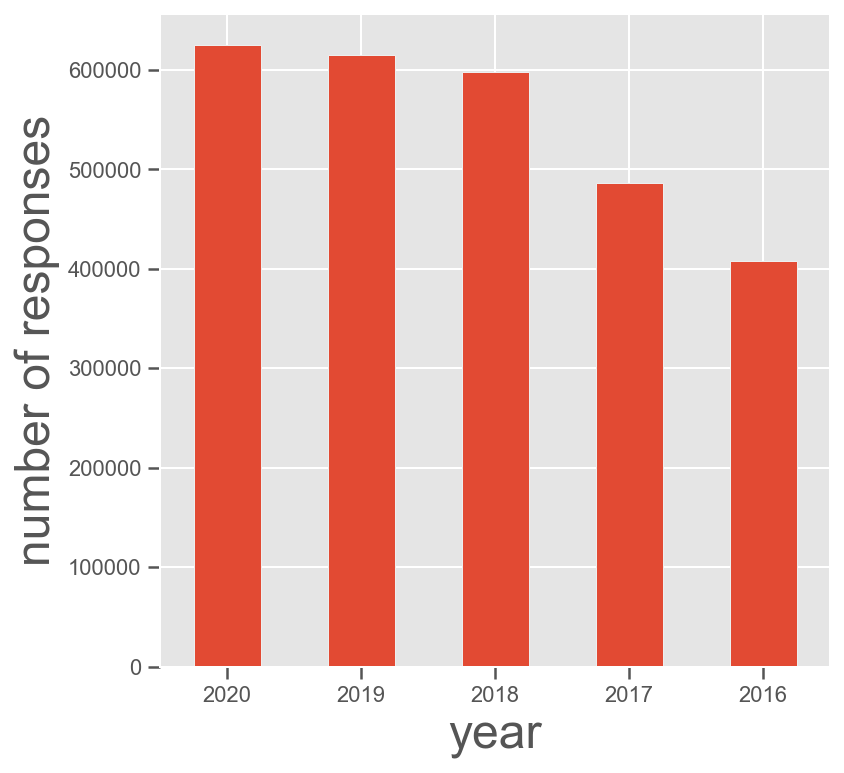

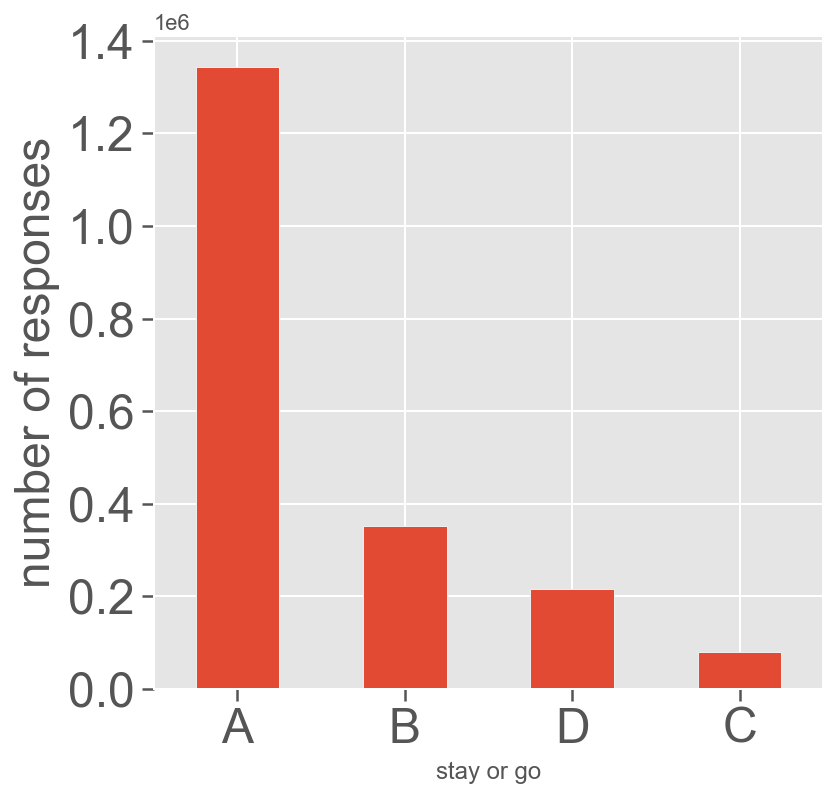

400000-624800 employees took the survey each year during 2016 to 2020.
Only 3.998 percent of people expressed intent to leave Federal Service for other places during 2016 to 2020.
Fully 67.524 percent of people devided to stay in Federal Service  in the same job during 2016 to 2020.
The data with regard to the Stay or Go question is imbalanced.


In [12]:
plt.style.use('ggplot')
# create a bar graph to depict the frequencies
byyear.plot(kind='bar', figsize=(6,6),rot=0);
plt.xlabel('year',fontsize=24)
plt.ylabel('number of responses',fontsize=24)
plt.show()
byQ237.plot(kind='bar', figsize=(6,6),rot=0,fontsize=24);
plt.xlabel('stay or go')
plt.ylabel('number of responses', fontsize=24)
plt.show()
#caculate the percect of stayorgo decision
A =1342968
B =350994
D=215417
C=79508
Cfrequence=C/(A+B+C+D)
Afrequence=A/(A+B+C+D)
print("400000-624800 employees took the survey each year during 2016 to 2020.")
print( f"Only {Cfrequence*100:.3f} percent of people expressed intent to leave Federal Service for other places during 2016 to 2020.")
print(f"Fully {Afrequence*100:.3f} percent of people devided to stay in Federal Service  in the same job during 2016 to 2020.")
print("The data with regard to the Stay or Go question is imbalanced.")
# Note: we need to redo these data for Q231 in 2020.

# Visualize responses to Q237 (Stay or Go) for each year from 2016-2019, and responses to Q231 for 2020.

In [13]:
#make sub-dataframe by year
byQ2372016=combined5yearindex3.loc[combined5yearindex3['year'] == 2016]['Q237'].value_counts()
byQ2372017=combined5yearindex3.loc[combined5yearindex3['year'] == 2017]['Q237'].value_counts()
byQ2372018=combined5yearindex3.loc[combined5yearindex3['year'] == 2018]['Q237'].value_counts()
byQ2372019=combined5yearindex3.loc[combined5yearindex3['year'] == 2019]['Q237'].value_counts()
byQ2312020=combined5yearindex3.loc[combined5yearindex3['year'] == 2020]['Q231'].value_counts()

print(byQ2372016, byQ2372017,byQ2372018,byQ2372019,byQ2312020)

A    260738
B     71018
D     40565
C     13849
Name: Q237, dtype: int64 A    317645
B     71128
D     51041
C     19504
Name: Q237, dtype: int64 A    382646
B    100354
D     62540
C     22298
Name: Q237, dtype: int64 A    381939
B    108494
D     61271
C     23857
Name: Q237, dtype: int64 A    393154
C     91472
B     63281
D     19150
Name: Q231, dtype: int64


Q237:Are you considering leaving your organization within the next year_ and if so_ why?A: No. B: Yes,to take another Federal job. C: Yes,to take a job outside Federal Gov. D: Other [includes retirement]
Q231: Today September-October 2020_ Are you considering leaving your organization within the next year_ and if so_ why?A: No. B: Yes, Other [includes retirement] C: Yes, to take another job within the Federal Government D: Yes, to take another job outside the Federal Government 


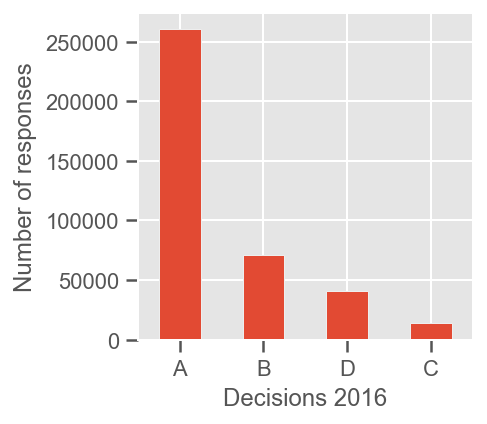

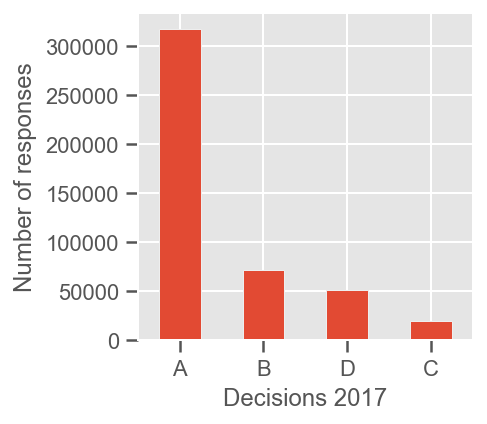

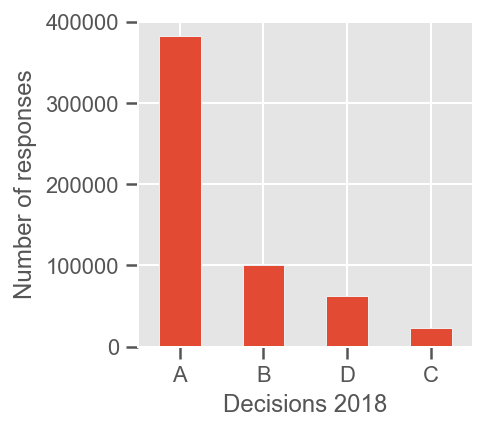

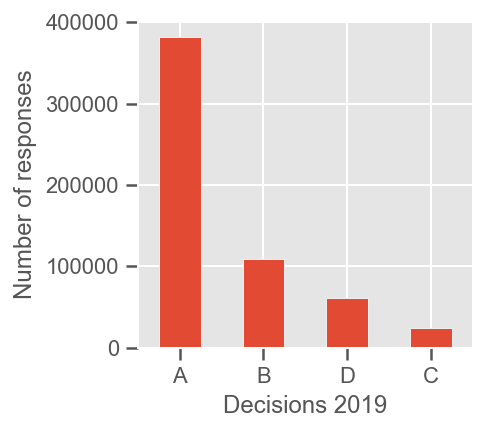

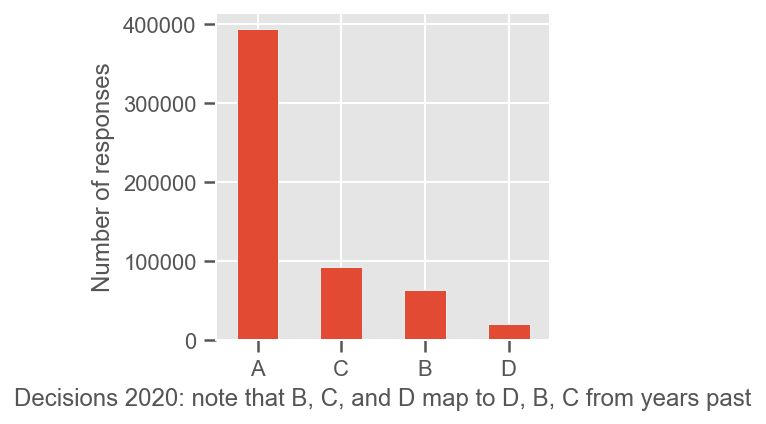

In [14]:
print("Q237:Are you considering leaving your organization within the next year_ and if so_ why?"
      "A: No.",
      "B: Yes,to take another Federal job.",
      "C: Yes,to take a job outside Federal Gov.",
      "D: Other [includes retirement]")
print("Q231: Today September-October 2020_ Are you considering leaving your organization within the next year_ and if so_ why?"
      "A: No.",
      "B: Yes, Other [includes retirement]",
      "C: Yes, to take another job within the Federal Government",
      "D: Yes, to take another job outside the Federal Government ")
plt.style.use('ggplot')
# create a bar graph to depict the frequencies for each year survey grouped by "stay or go"
plt.xlabel('Decisions 2016')
plt.ylabel('Number of responses')
byQ2372016.plot(kind='bar', figsize=(3,3),rot=0);
plt.show()
byQ2372017.plot(kind='bar', figsize=(3,3),rot=0);
plt.xlabel('Decisions 2017')
plt.ylabel('Number of responses')
plt.show()
byQ2372018.plot(kind='bar', figsize=(3,3),rot=0);
plt.xlabel('Decisions 2018')
plt.ylabel('Number of responses')
plt.show()
byQ2372019.plot(kind='bar', figsize=(3,3),rot=0);
plt.xlabel('Decisions 2019')
plt.ylabel('Number of responses')
plt.show()
byQ2312020.plot(kind='bar', figsize=(3,3),rot=0)
plt.xlabel('Decisions 2020: note that B, C, and D map to D, B, C from years past')
plt.ylabel('Number of responses')
plt.show()

 # Analyze Employee Engagement Index (EEI) questions for 5 years of survey data.


In [15]:
# make a sub-dataframe only for questions that were included in the EEI index
dfEEI = pd.DataFrame(data=combined5yearindex3,columns=['year','agency_id','Q104','Q105','Q106','Q107','Q108','Q122','Q123','Q124','Q125','Q126','Q127','Q128','Q129','Q131','Q132','Q231','Q237'])
dfEEI.head(10)

,year,agency_id,Q104,Q105,Q106,Q107,Q108,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q131,Q132,Q231,Q237
0,2016,TR,4.0,4.0,4,4,3,5,5.0,4.0,5.0,4.0,3,4,2,5,3,NaN,A
1,2016,AF,3.0,NaN,4,2,4,X,4.0,4.0,4.0,3.0,X,X,4,X,3,NaN,A
2,2016,TR,5.0,4.0,5,NaN,5,4,5.0,4.0,4.0,4.0,4,4,4,4,5,NaN,A
3,2016,TR,4.0,4.0,4,4,4,5,5.0,5.0,5.0,5.0,3,3,4,5,3,NaN,D
4,2016,HE,5.0,5.0,4,5,5,5,5.0,5.0,5.0,5.0,5,5,4,5,5,NaN,A
5,2016,HE,4.0,4.0,2,4,5,4,4.0,4.0,4.0,5.0,1,3,1,2,2,NaN,A
6,2016,CM,3.0,2.0,4,4,4,X,5.0,5.0,5.0,4.0,4,X,4,X,3,NaN,D
7,2016,AF,5.0,5.0,5,5,5,5,5.0,5.0,5.0,5.0,5,4,5,5,5,NaN,A
8,2016,AF,5.0,5.0,4,5,5,5,5.0,5.0,5.0,5.0,5,5,5,5,5,NaN,D
9,2016,AG,5.0,5.0,4,4,4,5,5.0,5.0,5.0,5.0,5,5,5,5,5,NaN,A


# Ensure all EEI question data are in numeric form: Where possible, convert strings to numbers.

In [16]:
dfEEI[['Q106','Q107','Q108','Q122','Q127','Q128','Q129','Q131','Q132']]= dfEEI[['Q106','Q107','Q108','Q122','Q127','Q128','Q129','Q131','Q132']].apply(pd.to_numeric,errors='coerce')

In [17]:
dfEEI.tail(10)

,year,agency_id,Q104,Q105,Q106,Q107,Q108,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q131,Q132,Q231,Q237
624790,2020,HS,5.0,5.0,4.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,3.0,A,NaN
624791,2020,HS,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,A,NaN
624792,2020,HS,5.0,5.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,A,NaN
624793,2020,HS,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,NaN,4.0,A,NaN
624794,2020,HS,1.0,4.0,4.0,3.0,2.0,5.0,5.0,5.0,5.0,5.0,1.0,2.0,3.0,5.0,2.0,B,NaN
624795,2020,HS,4.0,4.0,2.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,2.0,2.0,2.0,3.0,2.0,C,NaN
624796,2020,HS,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,A,NaN
624797,2020,HS,3.0,4.0,3.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,C,NaN
624798,2020,HS,4.0,4.0,4.0,3.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,B,NaN
624799,2020,HS,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,5.0,4.0,5.0,A,NaN


In [18]:
dfEEI.describe()

,year,Q104,Q105,Q106,Q107,Q108,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q131,Q132
count,2.732092e+06,2.714021e+06,2.713057e+06,2.708267e+06,2.675026e+06,2.706020e+06,2.641728e+06,2.673575e+06,2.670711e+06,2.671371e+06,2.673409e+06,2.601691e+06,2.498127e+06,2.615324e+06,2.506124e+06,2.612326e+06
mean,2.018206e+03,3.892961e+00,4.039856e+00,3.403266e+00,3.523792e+00,4.131097e+00,3.912410e+00,4.119914e+00,4.245753e+00,3.966252e+00,4.090176e+00,3.184621e+00,3.481229e+00,3.635467e+00,3.715589e+00,3.533088e+00
std,1.368376e+00,1.075541e+00,9.545277e-01,1.180824e+00,1.190464e+00,8.694855e-01,1.125589e+00,1.035939e+00,9.756713e-01,1.178057e+00,1.086124e+00,1.247318e+00,1.213221e+00,1.100786e+00,1.169134e+00,1.212328e+00
min,2.016000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.017000e+03,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
50%,2.018000e+03,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
75%,2.019000e+03,5.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,4.000000e+00
max,2.020000e+03,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [19]:
#check the values in our variables of interest
print(f"Q237: {dfEEI['Q237'].unique()}")
print(f"Q231: {dfEEI['Q231'].unique()}")

Q237: ['A' 'D' 'B' nan 'C']
Q231: [nan 'A' 'B' 'C' 'D']


# Use boxplot to analyze scores for EEI questions, grouped by responses to the Stay or Go Decision (Q237 in 2016-2019 and Q231 in 2020).  
The results show that employees who answered A (intend to "Stay" over the next year) rated highly on questions in the EEI index. Employees who expressed an intent to "Leave" by answering C in 2016-2019 or D in 2020, rated lower on questions in the EEI index. The analysis below shows the most striking contrast appearing in Q108, Q127, and Q128.

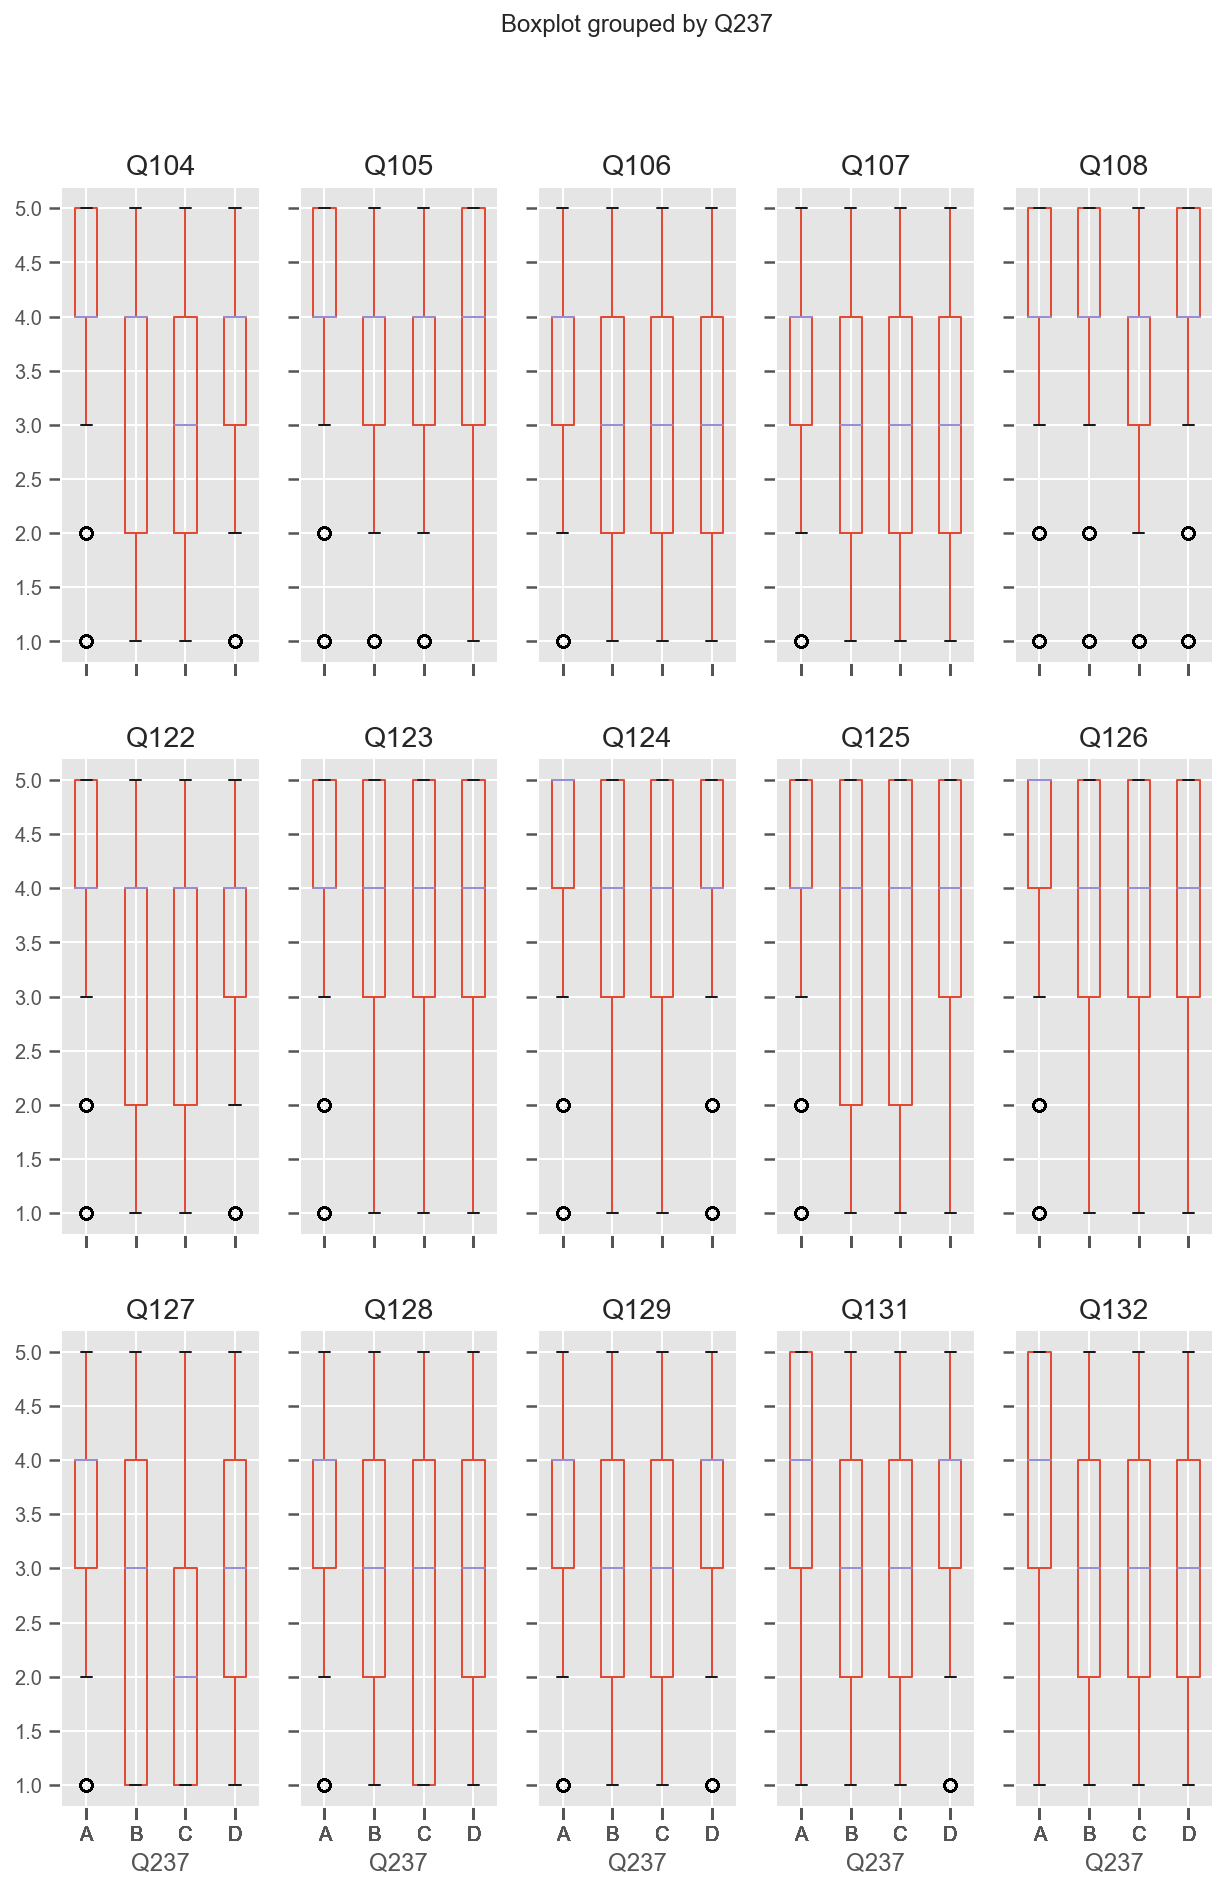

In [20]:
#A is Stay, C is Leave
boxplot=dfEEI.boxplot(column=['Q104','Q105','Q106','Q107','Q108','Q122','Q123','Q124',
                                'Q125','Q126','Q127','Q128','Q129','Q131','Q132'],
                        by= 'Q237',
                        fontsize=10,layout=(3,5),figsize=(10,15))

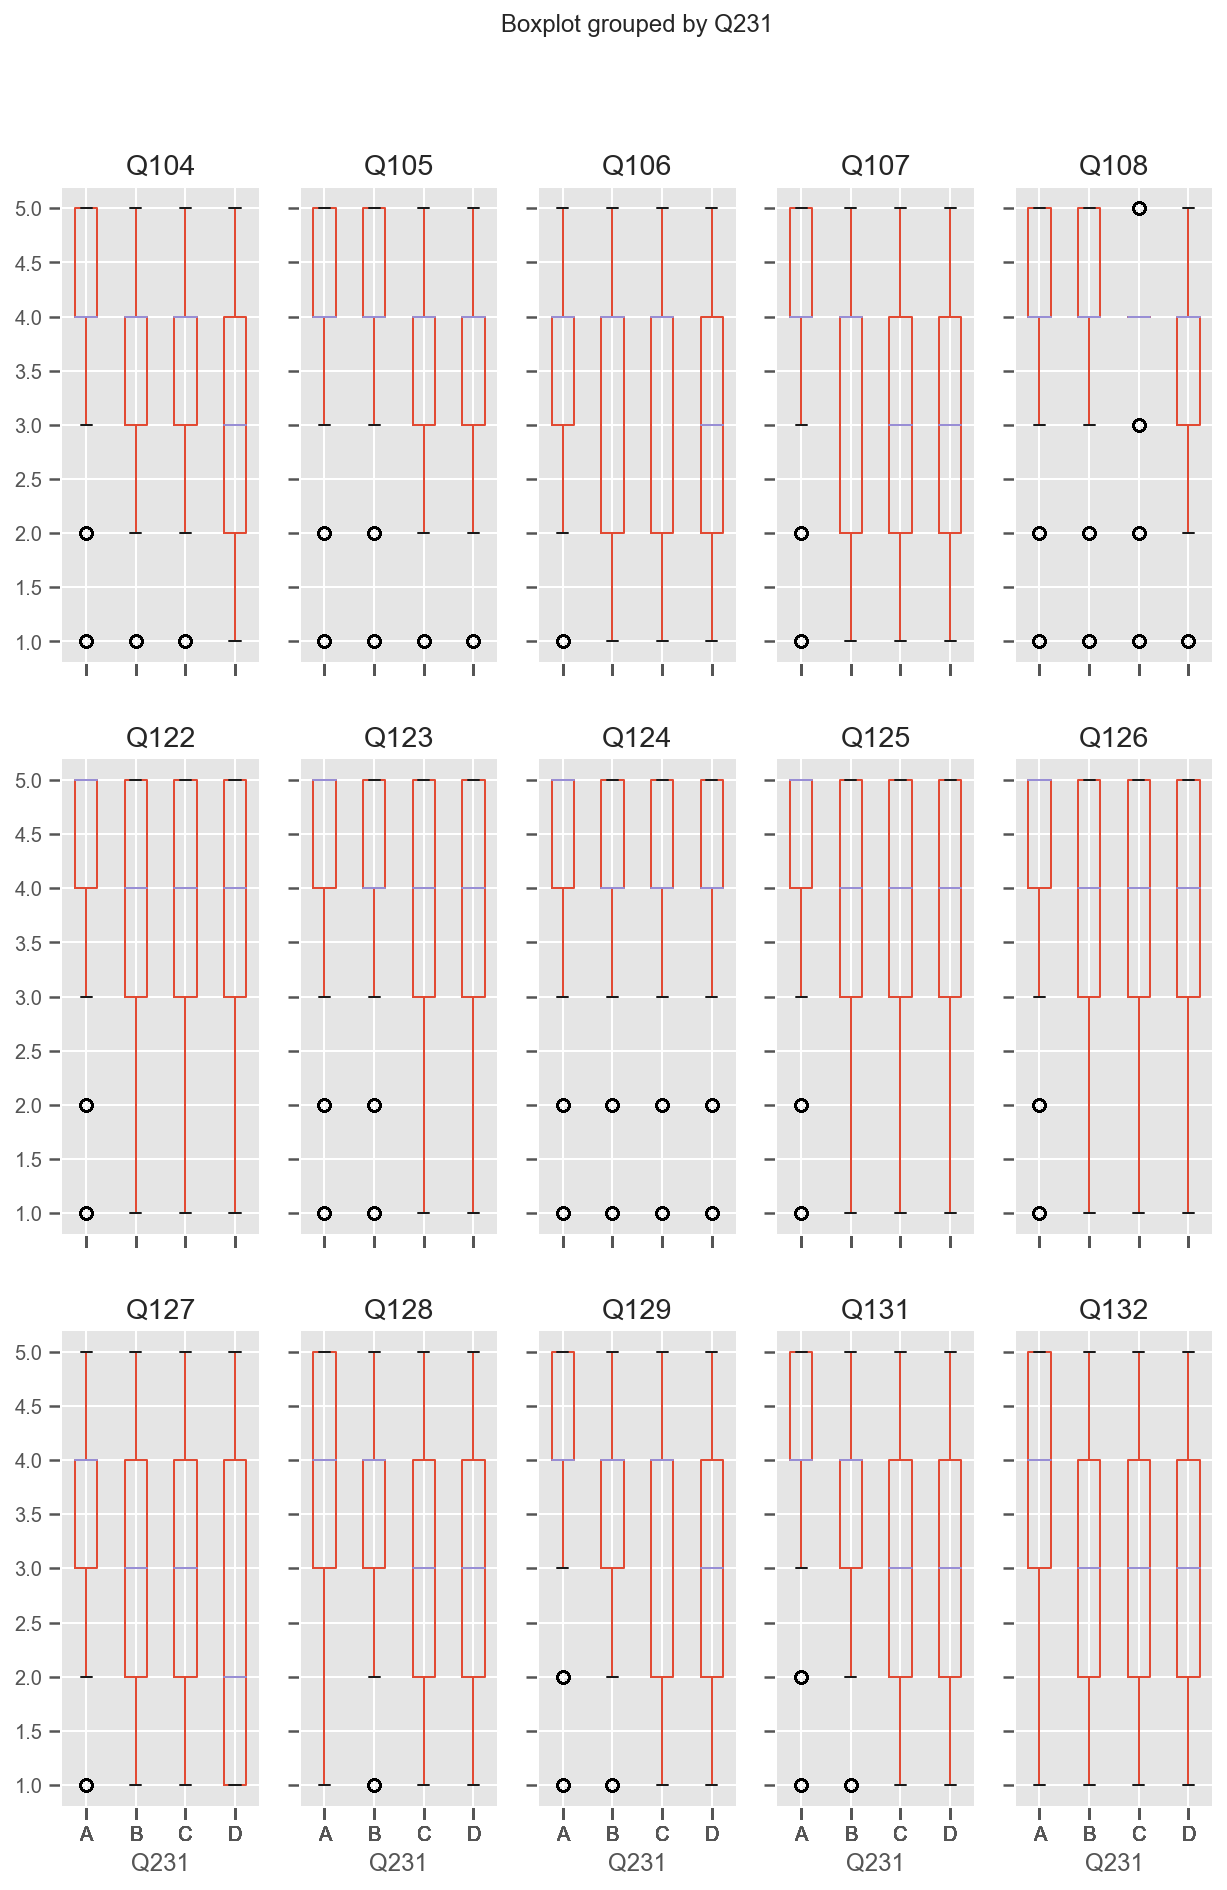

In [21]:
#A is Stay, D is Leave
boxplot=dfEEI.boxplot(column=['Q104','Q105','Q106','Q107','Q108','Q122','Q123','Q124',
                                'Q125','Q126','Q127','Q128','Q129','Q131','Q132'],
                        by= 'Q231',
                        fontsize=10,layout=(3,5),figsize=(10,15))

# Conduct further analysis on Q108, Q127, and Q128 in relation to the Stay or Go question. 
Given the sharp contrasts demonstrated above, these three survey questions could be the key factors that predict an employee's intent to Stay or Go (Q237 in 2016-2019 and Q231 in 2020) within the next year.

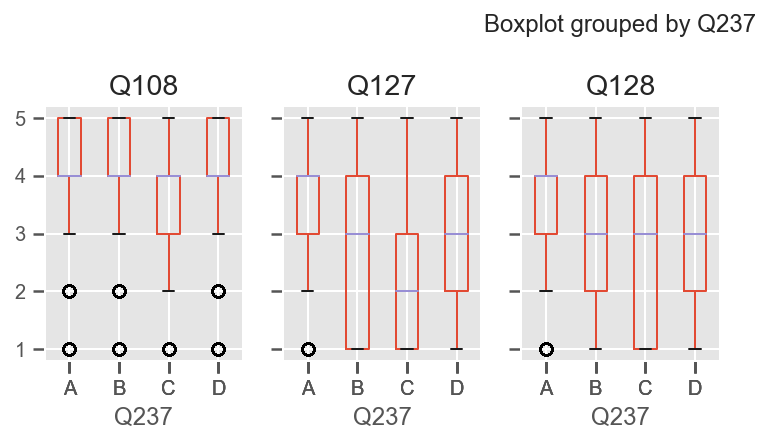

In [22]:
#Q108:my_work_experience I know how my work relates to the agency's goals.
#Q127 my_work_experience In my organization_ senior leaders generate high levels of motivation and commitment in the workforce.
#Q128 my_work_experience My organization's senior leaders maintain high standards of honesty and integrity.
boxplot=dfEEI.boxplot(column=['Q108','Q127','Q128'],
                        by= 'Q237',
                        fontsize=10,layout=(3,5),figsize=(10,8))
#A is Stay, C is Leave

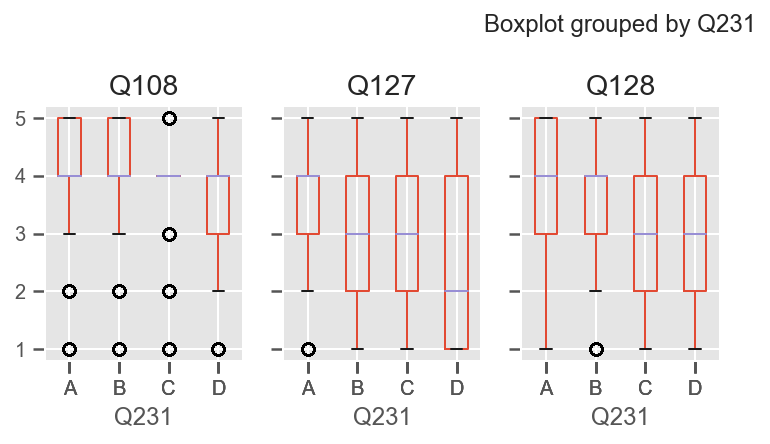

In [23]:
#Q108:my_work_experience I know how my work relates to the agency's goals.
#Q127 my_work_experience In my organization_ senior leaders generate high levels of motivation and commitment in the workforce.
#Q128 my_work_experience My organization's senior leaders maintain high standards of honesty and integrity.
boxplot=dfEEI.boxplot(column=['Q108','Q127','Q128'],
                        by= 'Q231',
                        fontsize=10,layout=(3,5),figsize=(10,8))
#A is Stay, D is Leave

# Compare average scores for all EEI questions, grouped by the Stay or Go decision, across all years.
The analysis below summarizes  the average scores from all questions included in the EEI, grouped by either the Q237 decision (2016-2019) or the Q231 decision (2020). The results indicate that overall, the people who expressed intent to "Stay" rated EEI questions highly on average, but those who expressed intent to "Leave" rated EEI questions lower on average. On average, those who expressed intent to leave to find a job outside the Federal Service rated the EEI questions lowest of all. 
# These results suggest that the questions included in the EEI index could be a set of factors that predict the Stay or Go decision (Q237 or Q231), so we will include these quesions in the ML dataset.

In [24]:
dfmean7=dfEEI.groupby('Q237').mean()
dfmean7=dfmean7.drop(columns=['year'])
dfmean7
# From 2016-2019, A is Stay, C is Leave

,Q104,Q105,Q106,Q107,Q108,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q131,Q132
Q237,,,,,,,,,,,,,,,
A,4.124341,4.199393,3.550516,3.780468,4.250955,4.091595,4.284545,4.397207,4.172032,4.273466,3.390387,3.681299,3.815644,3.920661,3.740565
B,3.343996,3.615033,2.961137,2.820062,3.851979,3.315620,3.659737,3.831787,3.371097,3.548091,2.577171,2.906977,3.137159,3.122844,2.992362
C,3.194329,3.514830,2.813429,2.679388,3.698880,3.322491,3.698462,3.870963,3.428260,3.580033,2.374137,2.800339,3.048728,3.062816,2.756216
D,3.552215,3.796857,3.116780,3.130928,3.900455,3.525344,3.796399,3.941018,3.585652,3.766497,2.792565,3.093905,3.323252,3.342237,3.114954


In [25]:
dfmean1=dfEEI.groupby('Q231').mean()
dfmean1=dfmean1.drop(columns=['year'])
dfmean1
# In 2020, A is Stay, D is Leave

,Q104,Q105,Q106,Q107,Q108,Q122,Q123,Q124,Q125,Q126,Q127,Q128,Q129,Q131,Q132
Q231,,,,,,,,,,,,,,,
A,4.177485,4.272024,3.708688,3.904780,4.316059,4.307085,4.399372,4.497079,4.311276,4.394826,3.587015,3.834929,3.924464,4.055113,3.874688
B,3.630757,3.894937,3.304654,3.321674,3.983372,3.838059,3.972258,4.100294,3.805245,3.963399,3.021957,3.298879,3.464551,3.541662,3.297563
C,3.376809,3.703088,3.106345,2.956750,3.893881,3.581468,3.774165,3.941127,3.533703,3.690036,2.741897,3.068656,3.227187,3.256153,3.126460
D,3.183142,3.606999,2.970514,2.822201,3.750225,3.580032,3.805091,3.976069,3.585852,3.731803,2.478390,2.865102,3.119233,3.182944,2.816118


In [26]:
dfmeantrans7=dfmean7.transpose()
dfmeantrans7
# From 2016-2019, A is Stay, C is Leave

Q237,A,B,C,D
Q104,4.124341,3.343996,3.194329,3.552215
Q105,4.199393,3.615033,3.514830,3.796857
Q106,3.550516,2.961137,2.813429,3.116780
Q107,3.780468,2.820062,2.679388,3.130928
Q108,4.250955,3.851979,3.698880,3.900455
Q122,4.091595,3.315620,3.322491,3.525344
Q123,4.284545,3.659737,3.698462,3.796399
Q124,4.397207,3.831787,3.870963,3.941018
Q125,4.172032,3.371097,3.428260,3.585652
Q126,4.273466,3.548091,3.580033,3.766497


In [27]:
dfmeantrans1=dfmean1.transpose()
dfmeantrans1
# In 2020, A is Stay, D is Leave

Q231,A,B,C,D
Q104,4.177485,3.630757,3.376809,3.183142
Q105,4.272024,3.894937,3.703088,3.606999
Q106,3.708688,3.304654,3.106345,2.970514
Q107,3.904780,3.321674,2.956750,2.822201
Q108,4.316059,3.983372,3.893881,3.750225
Q122,4.307085,3.838059,3.581468,3.580032
Q123,4.399372,3.972258,3.774165,3.805091
Q124,4.497079,4.100294,3.941127,3.976069
Q125,4.311276,3.805245,3.533703,3.585852
Q126,4.394826,3.963399,3.690036,3.731803


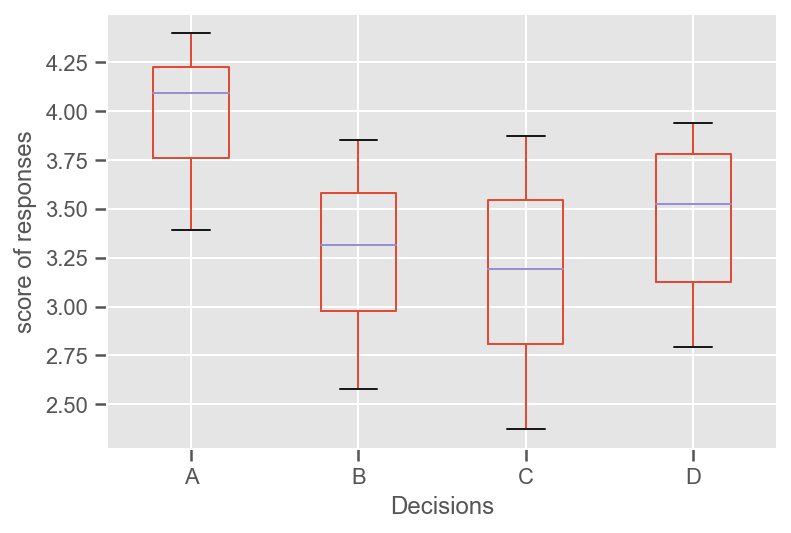

People who decided to LEAVE the Federal workforce (C in 2016-2019) had the lowest average response scores (y-axis) on the questions asked in the EEI index.


In [28]:
dfmeantrans7.boxplot()
plt.xlabel('Decisions')
plt.ylabel('score of responses')
plt.show()
print("People who decided to LEAVE the Federal workforce (C in 2016-2019) had the lowest average response scores (y-axis) on the questions asked in the EEI index.")
# From 2016-2019, A is Stay, C is Leave

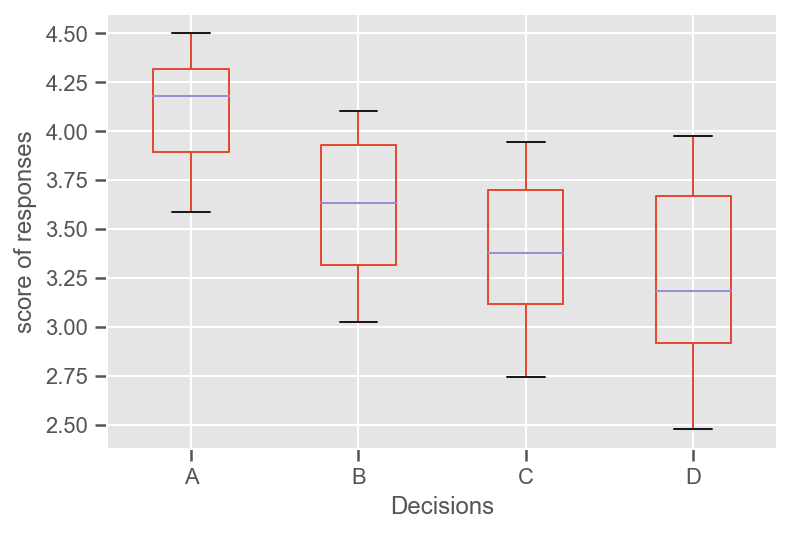

People who decided to LEAVE the Federal workforce (D in 2020) had the lowest average response scores (y-axis) on the questions asked in the EEI index.


In [29]:
dfmeantrans1.boxplot()
plt.xlabel('Decisions')
plt.ylabel('score of responses')
plt.show()
print("People who decided to LEAVE the Federal workforce (D in 2020) had the lowest average response scores (y-axis) on the questions asked in the EEI index.")
# In 2020, A is Stay, D is Leave

# Now analyze Global Satisfaction Index (GSI) for the 5 years of the survey.

In [30]:
# create new dataframe dfGSI
dfGSI = pd.DataFrame(data=combined5yearindex3,columns=['year','agency_id','Q118','Q137','Q138','Q139','Q231','Q237'])
dfGSI.head(10)

,year,agency_id,Q118,Q137,Q138,Q139,Q231,Q237
0,2016,TR,5.0,4.0,3.0,4.0,NaN,A
1,2016,AF,2.0,2.0,3.0,2.0,NaN,A
2,2016,TR,5.0,4.0,4.0,4.0,NaN,A
3,2016,TR,4.0,3.0,2.0,3.0,NaN,D
4,2016,HE,5.0,5.0,5.0,5.0,NaN,A
5,2016,HE,4.0,4.0,1.0,2.0,NaN,A
6,2016,CM,1.0,2.0,2.0,2.0,NaN,D
7,2016,AF,5.0,5.0,5.0,5.0,NaN,A
8,2016,AF,5.0,4.0,4.0,4.0,NaN,D
9,2016,AG,5.0,5.0,5.0,5.0,NaN,A


In [31]:
# examine 2020 data
dfGSI.tail(10)

,year,agency_id,Q118,Q137,Q138,Q139,Q231,Q237
624790,2020,HS,4.0,4.0,4.0,4.0,A,NaN
624791,2020,HS,5.0,5.0,4.0,5.0,A,NaN
624792,2020,HS,4.0,5.0,5.0,5.0,A,NaN
624793,2020,HS,3.0,4.0,4.0,4.0,A,NaN
624794,2020,HS,2.0,2.0,4.0,2.0,B,NaN
624795,2020,HS,3.0,4.0,4.0,3.0,C,NaN
624796,2020,HS,5.0,5.0,4.0,5.0,A,NaN
624797,2020,HS,1.0,3.0,4.0,1.0,C,NaN
624798,2020,HS,4.0,5.0,5.0,5.0,B,NaN
624799,2020,HS,5.0,5.0,4.0,5.0,A,NaN


In [32]:
dfGSI.describe()

,year,Q118,Q137,Q138,Q139
count,2.732092e+06,2.684586e+06,2.632819e+06,2.635587e+06,2.632678e+06
mean,2.018206e+03,3.779857e+00,3.768266e+00,3.596281e+00,3.595169e+00
std,1.368376e+00,1.087723e+00,1.065198e+00,1.145562e+00,1.103388e+00
min,2.016000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.017000e+03,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
50%,2.018000e+03,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
75%,2.019000e+03,5.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
max,2.020000e+03,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


In [33]:
#Create a frequency count for the Stay or Go decision for 2016-2019
#A	No
#B	Yes, to take another Federal job
#C	Yes, to take a job outside Federal Gov
#D	Other
print("Q237:Are you considering leaving your organization within the next year_ and if so_ why?"
      "A: No.",
      "B: Yes,to take another Federal job.",
      "C: Yes,to take a job outside Federal Gov.",
      "D: Other [includes retirement]")
stayorgo= dfGSI['Q237'].value_counts()
print(stayorgo)
print("From 2016-2019, A is Stay, C is Leave")

Q237:Are you considering leaving your organization within the next year_ and if so_ why?A: No. B: Yes,to take another Federal job. C: Yes,to take a job outside Federal Gov. D: Other [includes retirement]
A    1342968
B     350994
D     215417
C      79508
Name: Q237, dtype: int64
From 2016-2019, A is Stay, C is Leave


In [34]:
#Create a frequency count for the Stay or Go decision for 2020
#A No
#B Yes, Other [includes retirement] 
#C Yes, to take another job within the Federal Government 
#D Yes, to take another job outside the Federal Government 
print("Q231: Today September-October 2020_ Are you considering leaving your organization within the next year_ and if so_ why?"
      "A: No.",
      "B: Yes, Other [includes retirement]",
      "C: Yes, to take another job within the Federal Government",
      "D: Yes, to take another job outside the Federal Government ")
stayorgo= dfGSI['Q231'].value_counts()
print(stayorgo)
print("In 2020, A is Stay, D is Leave")

Q231: Today September-October 2020_ Are you considering leaving your organization within the next year_ and if so_ why?A: No. B: Yes, Other [includes retirement] C: Yes, to take another job within the Federal Government D: Yes, to take another job outside the Federal Government 
A    393154
C     91472
B     63281
D     19150
Name: Q231, dtype: int64
In 2020, A is Stay, D is Leave


# Sample responses to Q139, as one example
"Considering everything, how satisfied are you with your organization?"<br>
5 Very Satisfied<br>
4 Satisfied	<br>
3 Neither Satisfied nor Dissatisfied	<br>
2 Dissatisfied	<br>
1 Very Dissatisfied<br>

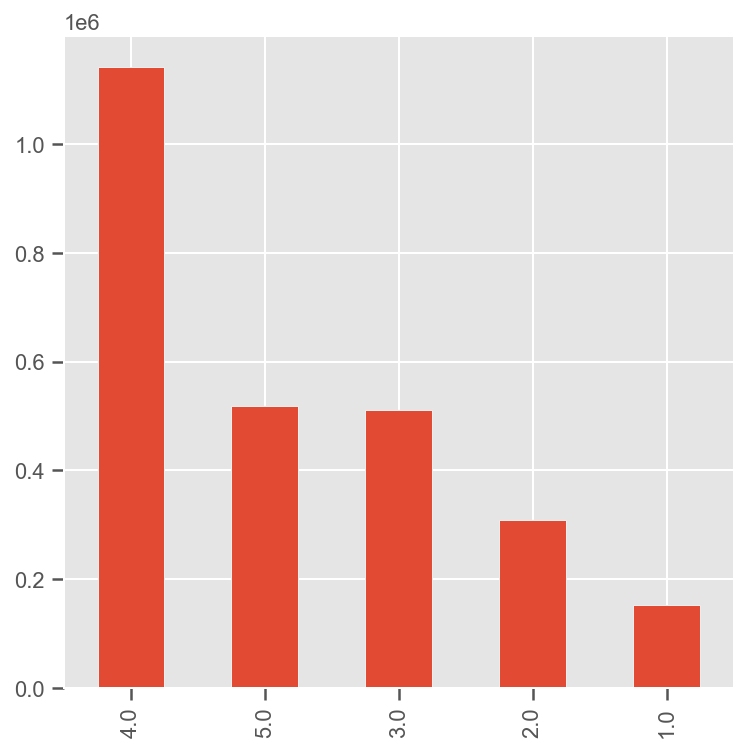

In [35]:
# looking only at responses to Q139, a difference in frequency counts is evident
overallsatis=dfGSI['Q139'].value_counts()
overallsatis.plot(kind='bar', figsize=(6,6));

 # Perform a Chi-Square test to determine...

In [36]:
# make a cross table for chi-squar test
contingency_table = pd.crosstab(
    dfGSI['Q237'],
    dfGSI['Q139'],
    margins = True
)
contingency_table


Q139,1.0,2.0,3.0,4.0,5.0,All
Q237,,,,,,
A,31695,94450,218923,659022,330292,1334382
B,49994,82789,95527,101165,19586,349061
C,15290,21686,19794,18640,3699,79109
D,25496,40663,52856,70807,23484,213306
All,122475,239588,387100,849634,377061,1975858


Each cell in the table represents a frequency count. For example, the intersection of row 'A' row and column '4.0' represents the number of responses of those who answered A (Stay) on Q 237 (2016-2019) and also chose Satisfied (4) on Q139. The ALL totals show the number who answered A to Q237 or 4 to Q139 regardless of their answer to the other question.

In [37]:
#sample all the "Stay" responses
Acount = contingency_table.iloc[0][0:5].values
print(Acount)

[ 31695  94450 218923 659022 330292]


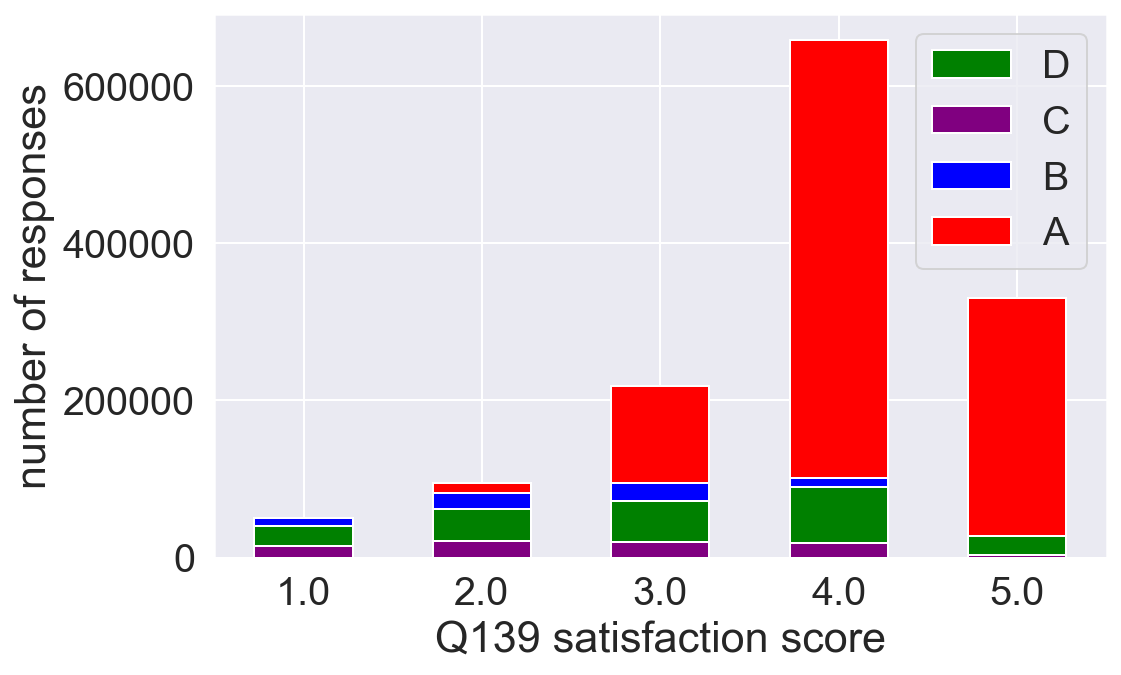

In [38]:
#Assign the frequency values
Acount = contingency_table.iloc[0][0:5].values
Bcount = contingency_table.iloc[1][0:5].values
Ccount = contingency_table.iloc[2][0:5].values
Dcount = contingency_table.iloc[3][0:5].values
#Plot the bar chart
fig = plt.figure(figsize=(8, 5))
sns.set(font_scale=1.8)
categories = ["1.0","2.0","3.0","4.0","5.0"]
p1= plt.bar(categories, Acount, 0.55, color='red')
p2 = plt.bar(categories, Bcount, 0.55, color='blue')
p3 = plt.bar(categories, Ccount, 0.55, color='purple')
p4 = plt.bar(categories, Dcount, 0.55, color='green',bottom=Ccount)
plt.legend((p4[0], p3[0],p2[0], p1[0]), ('D', 'C','B','A'))
plt.xlabel('Q139 satisfaction score')
plt.ylabel('number of responses')
plt.show()
 

The bar chart above shows the intersection of those who answered A, B, C, or D in 2016-2019 AND 1, 2, 3, 4 or, 5 on Q139 regarding satisfaction. From 2016-2019, A is Stay, C is Leave. It is evident that those expressing an intention to leave answered from Very Dissatisfied to Satisfied on Q139 about their organization. However, the proportion of those reporting the lowest scores were those most likely to leave their organization for some reason: to retire, to take another job in Federal Service, or to leave Federal Service altogether.

 ### To Do: analyze Q231 here too.

# The Null and Alternate Hypotheses
Recall that we are interested in knowing if there is a relationship between Q139, the employee's satisfaction with their organization, and Q237, their intention to stay or go. In order to do so, we will use the Chi-Square test. But first, we will state our null hypothesis and the alternative hypothesis.

𝐻0: There is no statistically significant relationship between an employee's intent to Stay or Go, and their global satisfaction with their organization as measured by Q139.<br>
𝐻𝑎: There is a statistically significant relationship between an employee's intent to Stay or Go, and their global satisfaction with their organization as measured by Q139. 



# Test 𝐻0: There is no statistically significant relationship between an employee's intent to Stay (A) or Go (B, to take another Federal Job), and their global satisfaction with the organization as measured by Q139.
We must analyze each response in pair-wise fashion.

In [39]:
#example:
#A	No
#B	Yes, to take another Federal job
f_obs = np.array([Acount,Bcount])
print(f_obs)

[[ 31695  94450 218923 659022 330292]
 [ 49994  82789  95527 101165  19586]]


In [40]:
chi2_results = stats.chi2_contingency(f_obs)
print(chi2_results)

(246231.5684779903, 0.0, 4, array([[ 64750.82981604, 140488.58874224, 249248.96174091,
        602562.63469212, 277330.9850087 ],
       [ 16938.17018396,  36750.41125776,  65201.03825909,
        157624.36530788,  72547.0149913 ]]))


In [41]:
p_value =chi2_results[1]
df = chi2_results[2]
chi2_test_statistic = chi2_results[0]
print(f"The chi-square value calculated is {chi2_test_statistic:.3f}, ")
print(f"and with {df} degrees of freedom, the resulting p-value is {p_value:.3f}.")

The chi-square value calculated is 246231.568, 
and with 4 degrees of freedom, the resulting p-value is 0.000.


# Test 𝐻0:There is no statistically significant relationship between "Go" B, to take another Federal Job, or C, to take a job outside the Federal Government, and their global satisfaction with the organization as measured by Q139.

In [42]:
#B	Yes, to take another Federal job
#C	Yes, to take a job outside Federal Gov
f_obs1 = np.array([Bcount,Ccount])
print(f_obs1)

[[ 49994  82789  95527 101165  19586]
 [ 15290  21686  19794  18640   3699]]


In [43]:
chi2_results1 = stats.chi2_contingency(f_obs1)
print(chi2_results1)

(2333.086859666791, 0.0, 4, array([[53222.08077166, 85172.1231637 , 94014.2083308 , 97669.74123596,
        18982.84649789],
       [12061.91922834, 19302.8768363 , 21306.7916692 , 22135.25876404,
         4302.15350211]]))


In [44]:
p_value =chi2_results1[1]
df = chi2_results1[2]
chi2_test_statistic = chi2_results1[0]
print(f"The chi-square value calculated is {chi2_test_statistic:.3f}, ")
print(f"and with {df} degrees of freedom, the resulting p-value is {p_value:.3f}.")

The chi-square value calculated is 2333.087, 
and with 4 degrees of freedom, the resulting p-value is 0.000.


# Test 𝐻0:There is no statistically significant relationship between "Stay", A, and "Go" C, to take a job outside the Federal Government, and their global satisfaction with the organization as measured by Q139.

In [45]:
#A	No
#C	Yes, to take a job outside Federal Gov
f_obs2 = np.array([Acount,Ccount])
print(f_obs2)

[[ 31695  94450 218923 659022 330292]
 [ 15290  21686  19794  18640   3699]]


In [46]:
chi2_results2 = stats.chi2_contingency(f_obs2)
p_value =chi2_results2[1]
df = chi2_results2[2]
chi2_test_statistic = chi2_results2[0]
print(f"The chi-square value calculated is {chi2_test_statistic:.3f}, ")
print(f"and with {df} degrees of freedom, the resulting p-value is {p_value:.3f}.")


The chi-square value calculated is 128562.983, 
and with 4 degrees of freedom, the resulting p-value is 0.000.


# The tests above reveal that intent to "Stay" or "Go" bears a significant relationship with an employee's answers to Q139 regarding how satisfied they are with their organization.

Note: also need to look at Q231.

# Next, analyze employees' responses to GSI questions in comparison to their intent to Stay or Go.

# The Boxplots below show average scores on questions included in the GSI index grouped by respondents' answers to the Stay or Go question.
Results indicate that employees to expressed intent to "Stay" (A) also rated GSI Index questions highly. Those who expressed intent to "Leave" rated GSI Index questions lower on average.
(Q237 in 2016-2019; Q231 in 2020.)

From 2016-2019, A is Stay, C is Leave


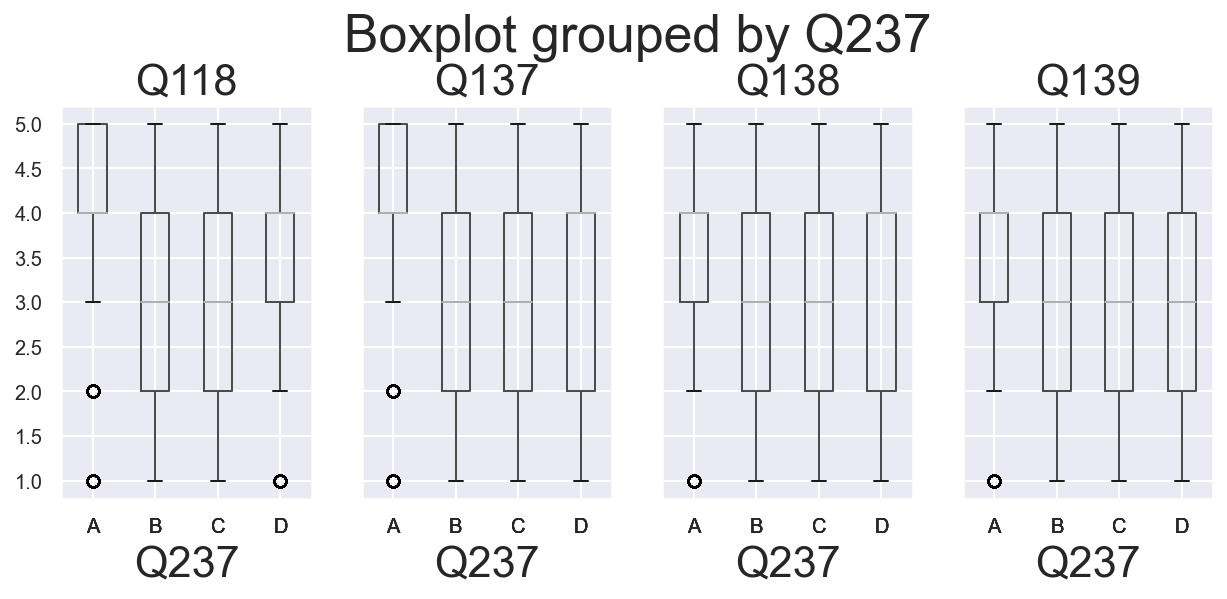

In [47]:
boxplot = dfGSI.boxplot(column=['Q118', 'Q137', 'Q138','Q139'], by= 'Q237',fontsize=10,layout=(2,4),figsize=(10,8))  
#From 2016-2019, A is Stay, C is Leave
print("From 2016-2019, A is Stay, C is Leave")

In 2020, A is Stay, D is Leave


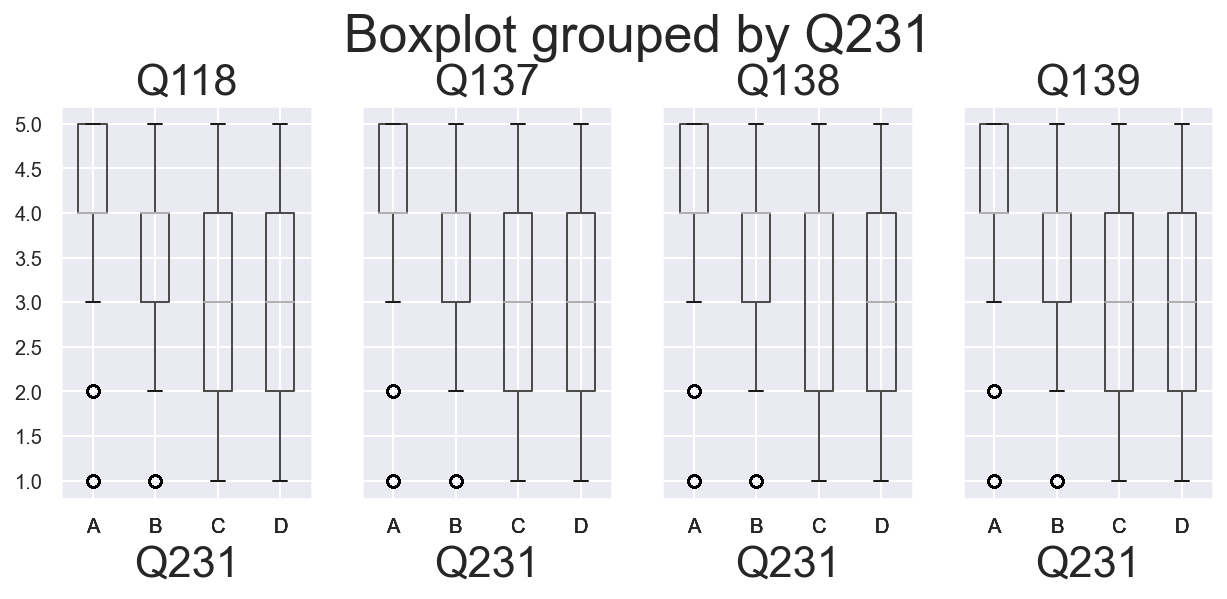

In [48]:
boxplot = dfGSI.boxplot(column=['Q118', 'Q137', 'Q138','Q139'], by= 'Q231',fontsize=10,layout=(2,4),figsize=(10,8))  
#In 2020, A is Stay, D is Leave
print("In 2020, A is Stay, D is Leave")

# Check for correlations among the questions in the GSI Index, grouped by responses to the Stay or Go question. 
Regression plots below show mostly positive correlations between the questions in the GSI Index. This means that employees who rated one of the GSI questions highly, would most likely rate other GSI questions highly. <br>
#Q118	my_agency	I recommend my organization as a good place to work.<br>
#Q137	individual	Considering everything_ how satisfied are you with your job?<br>
#Q138	individual	Considering everything_ how satisfied are you with your pay?<br>
#Q139	individual	Considering everything_ how satisfied are you with your organization?<br>

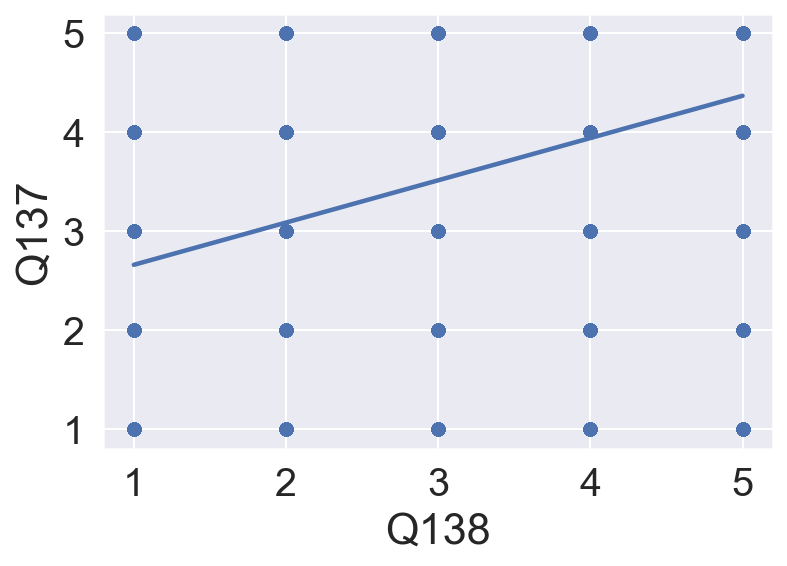

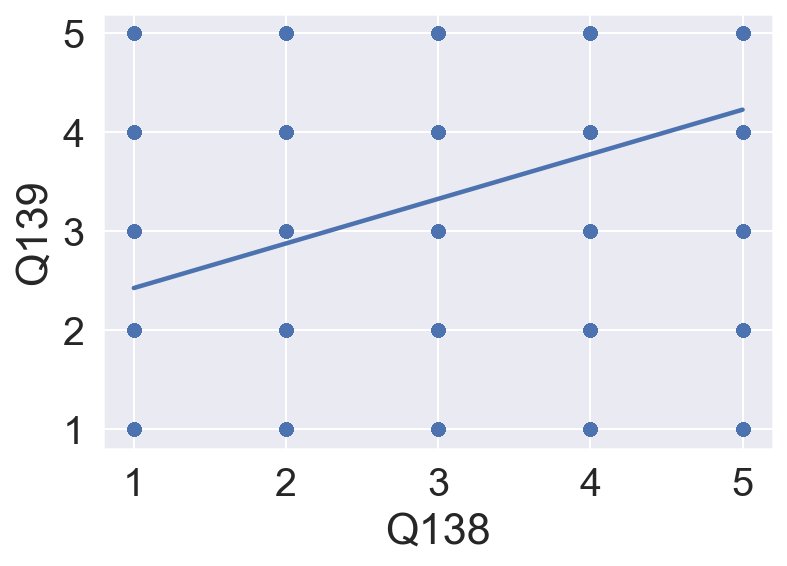

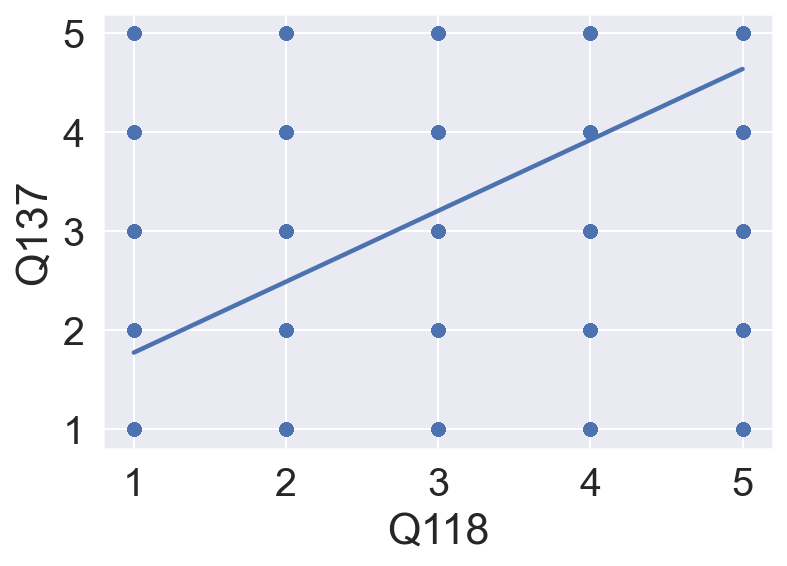

In [49]:
sns.regplot(x=dfGSI["Q138"], y=dfGSI["Q137"], scatter=True, fit_reg=True)
plt.show()
sns.regplot(x=dfGSI["Q138"], y=dfGSI["Q139"], fit_reg=True)
plt.show()
sns.regplot(x=dfGSI["Q118"], y=dfGSI["Q137"], fit_reg=True)
plt.show()


# Example regression analysis for GSI questions Q137 and Q118, grouped by the Stay or Go decision (2016 only).
The results indicate that the scores rated to quetions Q137 vs Q118 are positivly correlated, regardless of the response to the Stay or Go decision (Q237 in 2016-2019). This means that among all those surveyed those who rate Q137 highly will rate Q118 highly as well.

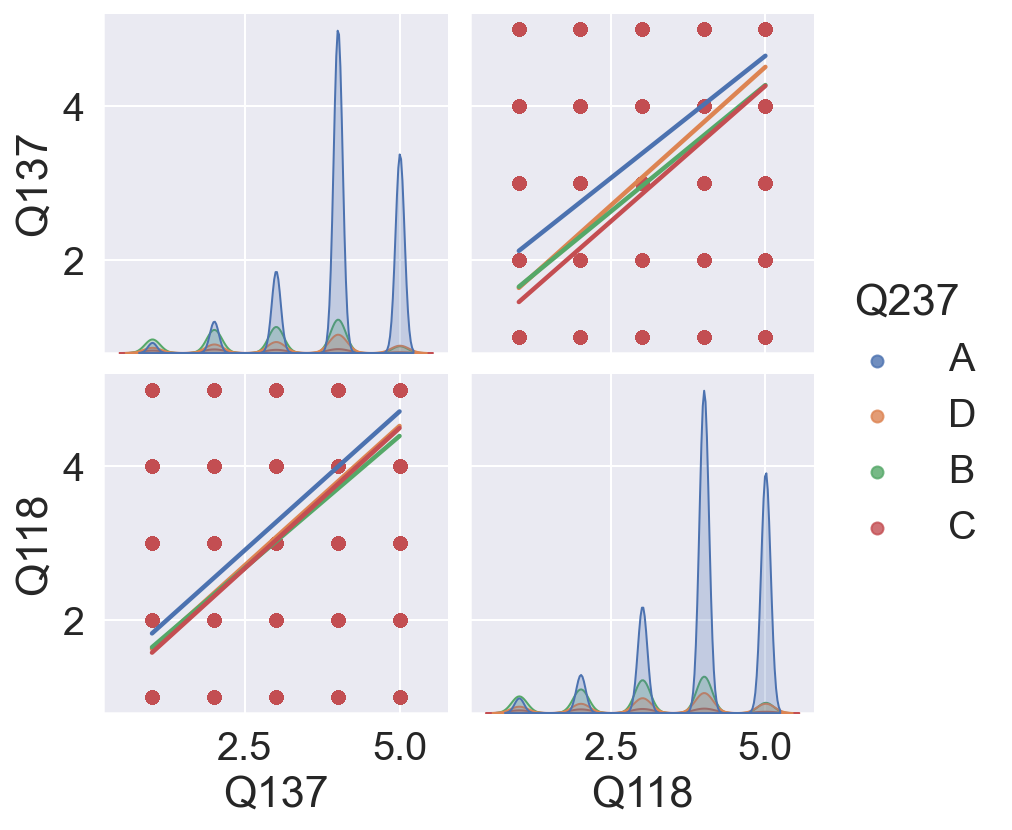

In [50]:
# only use 2016 data for analysis, otherwise the analysis takes forever on my computer 
g = sns.pairplot(dfGSI[dfGSI['year'] == 2016], height=3, kind="reg",
                 vars=["Q137", "Q118"], hue="Q237")

# Summarize  the average scores from all questions in the GSI, grouped by the decision to Stay or Go. 
The results indicate that overall, the people who expressed intent to "Stay" rated answers to GSI questions higher, on average, while those with intent to "Leave" rated answers to GSI scores lower, on average. Those who expressed intent to find a job outside the Federal Service rated answers to the GSI questions lowest of all. 

In [51]:
dfmean7=dfGSI.groupby('Q237').mean()
dfmean7=dfmean7.drop(columns=['year'])
dfmean7
#From 2016-2019, A is Stay, C is Leave

,Q118,Q137,Q138,Q139
Q237,,,,
A,4.061347,4.064111,3.766182,3.870640
B,3.074909,3.025110,3.115927,2.878417
C,2.911325,2.803113,2.818577,2.668457
D,3.324195,3.324463,3.342082,3.122453


In [52]:
dfmean7=dfmean7.transpose()
dfmean7
#From 2016-2019, A is Stay, C is Leave

Q237,A,B,C,D
Q118,4.061347,3.074909,2.911325,3.324195
Q137,4.064111,3.025110,2.803113,3.324463
Q138,3.766182,3.115927,2.818577,3.342082
Q139,3.870640,2.878417,2.668457,3.122453


<AxesSubplot:>

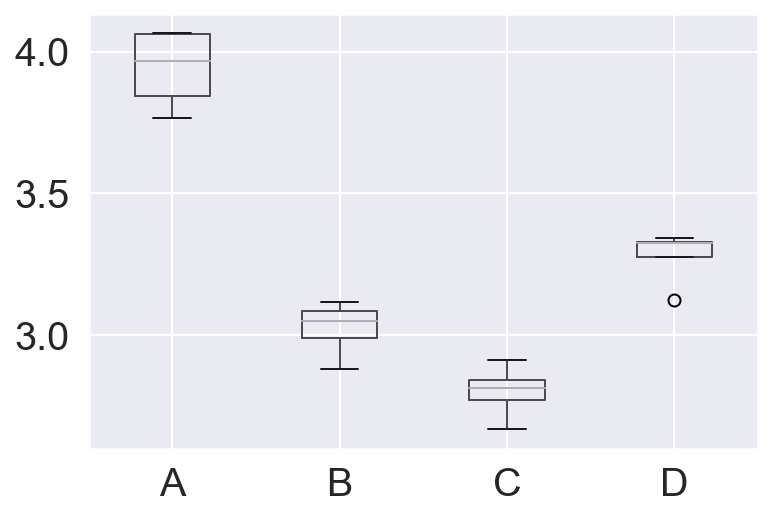

In [53]:
dfmean7.boxplot()
#From 2016-2019, A is Stay, C is Leave

In [54]:
print('Employees who expressed intent to find a job outside the Federal Service rated answers to the GSI questions lowest of all.')

Employees who expressed intent to find a job outside the Federal Service rated answers to the GSI questions lowest of all.


In [55]:
dfmean1=dfGSI.groupby('Q231').mean()
dfmean1=dfmean1.drop(columns=['year'])
dfmean1
#In 2020, A is Stay, D is Leave

,Q118,Q137,Q138,Q139
Q231,,,,
A,4.149436,4.140916,3.892686,3.991443
B,3.489647,3.447886,3.560393,3.316464
C,3.171084,3.083246,3.204655,2.995967
D,2.983274,2.818848,2.945698,2.723255


In [56]:
dfmean1=dfmean1.transpose()
dfmean1
#In 2020, A is Stay, D is Leave

Q231,A,B,C,D
Q118,4.149436,3.489647,3.171084,2.983274
Q137,4.140916,3.447886,3.083246,2.818848
Q138,3.892686,3.560393,3.204655,2.945698
Q139,3.991443,3.316464,2.995967,2.723255


<AxesSubplot:>

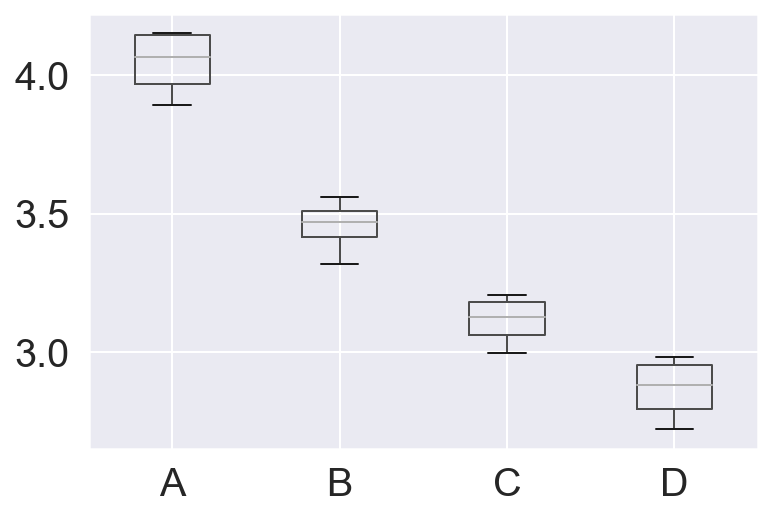

In [58]:
dfmean1.boxplot()
#In 2020, A is Stay, D is Leave